# Name: Yucan Luo    USC ID : 8085970332

# (b) Exploring the data:
i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing


data = pd.read_excel("../CCPP/Folds5x2_pp.xlsx")
f = data.values
print("Rows and columns :")
print(f.shape)
print("Each column represents:")
col = data.columns
print(col)

Rows and columns :
(9568, 5)
Each column represents:
Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')


There are 9568 rows and 5 columns.

Each row is a data point, which is collected from a Combined Cycle Power Plant over 6 years ; each column is a feature. 

Columns include Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH), Exhaust Vacuum (V) and energy output (PE).

# ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

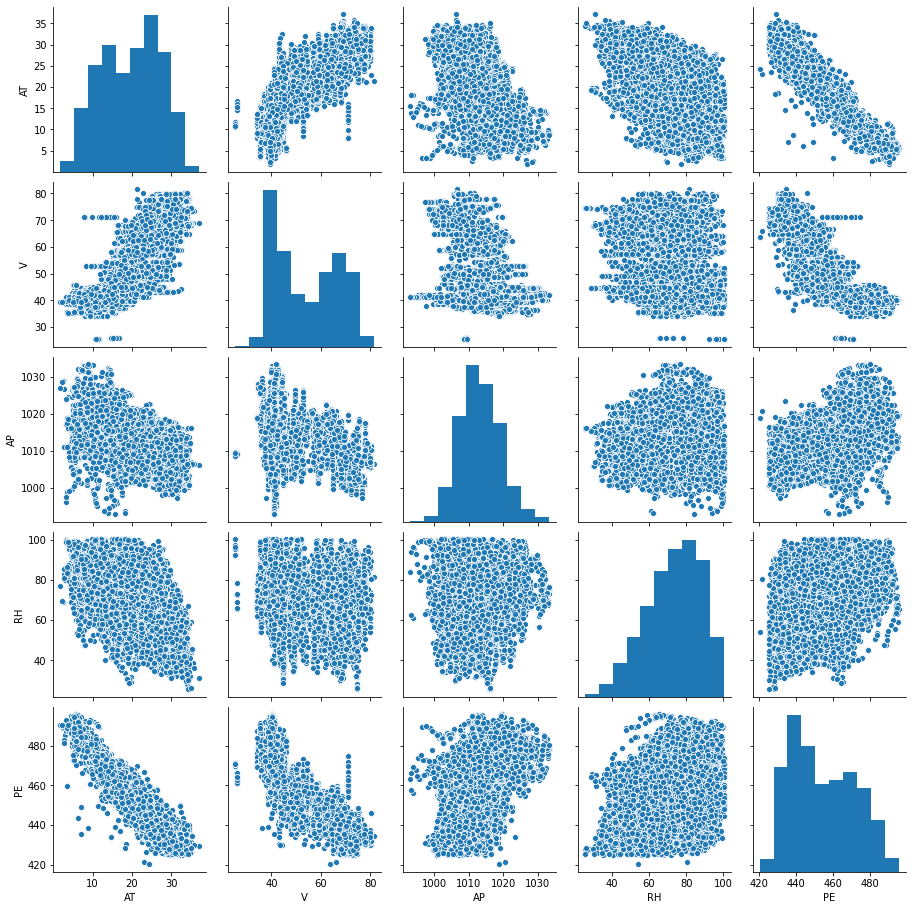

In [4]:
import seaborn as sns
%matplotlib inline

sns.pairplot(data)
plt.show()

From the plot, I noticed that there are negative correlations between Temperature(AT) and Net hourly Electrical Energy Output(PE) ; also, there might be negative correlation between Exhaust Vacuum(V) and Net hourly Electrical Energy Output(PE). 

From the histgram, we can find that none of our variables except Ambient Pressure display normality.

# (iii). What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [5]:
table = pd.DataFrame({
    "Mean": data.mean(),
    "Median": data.median(),
    "Range": (data.max()-data.min()),
    "First Quartiles": data.quantile(.25),
    "Third Quartiles": data.quantile(.75),
    "Interquartile Range": data.quantile(.75) - data.quantile(.25)
})
table

,Mean,Median,Range,First Quartiles,Third Quartiles,Interquartile Range
AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
V,54.305804,52.080,56.20,41.7400,66.54,24.8000
AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


# (c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

In [6]:
from statsmodels.api import OLS
import statsmodels.api as sm
from sklearn import linear_model


In [7]:
## the first model is AT~ PE 

X = data["AT"] ##  predictor AT
y = data["PE"] ## target value
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() 
predictions = model.predict(X)

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:34:02   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

According to the p-value, we can see that p-value close to 0, so PE` AT model is statistically significant.

In [8]:
#find outliers
outliers=model.outlier_test()
outliers = pd.DataFrame(outliers)

## Bonferroni outlier test
## if bonf(p) <0.1 we identify it as outliers 

outliers_position = outliers['bonf(p)']<0.1
outlier_points = data[outliers_position]
if not outlier_points.empty:
    print("Outliers for AT model are: \n", outlier_points)
else:
    print("No outliers! ")

Outliers for AT model are: 
          AT      V       AP     RH      PE
1438  15.61  38.52  1018.40  80.99  439.21
3117   8.74  36.30  1015.18  61.97  438.63
3383   6.22  39.85  1012.05  86.88  443.73
3895  14.69  49.64  1023.43  78.17  434.12
4218  23.00  66.05  1020.61  80.29  421.57
7375  18.60  58.71  1009.80  86.42  430.38
7398   7.06  41.74  1021.95  90.38  448.97
7664   7.14  41.22  1016.60  97.09  435.58
8187  18.26  61.27  1019.10  74.74  428.67
8362   3.40  39.64  1011.10  83.43  459.86
8717  24.27  63.87  1018.88  53.96  420.26


In [9]:
## the first model is V~ PE

X = data["V"] ##  predictor V
y = data["PE"] ## target value
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() 
predictions = model.predict(X)

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:34:27   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

In [10]:
#find outliers
outliers=model.outlier_test()
outliers = pd.DataFrame(outliers)

## Bonferroni outlier test
## if bonf(p) <0.1 we identify it as outliers 

outliers_position = outliers['bonf(p)']<0.1
outlier_points = data[outliers_position]
if not outlier_points.empty:
    print("Outliers for V model are: \n", outlier_points)
else:
    print("No outliers! ")

Outliers for V model are: 
         AT      V       AP     RH      PE
1709  8.13  71.14  1018.94  86.70  471.99
3103  7.89  71.14  1018.40  86.49  474.66


In [11]:
## the first model is AP~ PE

X = data["AP"] ##  predictor AP
y = data["PE"] ## target value
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() 
predictions = model.predict(X)

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:34:48   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

In [12]:
#find outliers
outliers=model.outlier_test()
outliers = pd.DataFrame(outliers)

## Bonferroni outlier test
## if bonf(p) <0.1 we identify it as outliers 

outliers_position = outliers['bonf(p)']<0.1
outlier_points = data[outliers_position]
if not outlier_points.empty:
    print("Outliers for AP model are: \n", outlier_points)
else:
    print("No outliers! ")

No outliers! 


In [13]:
## the first model is RH~ PE

X = data["RH"] ##  predictor RH
y = data["PE"] ## target value
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() 
predictions = model.predict(X)

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:35:10   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

In [14]:
#find outliers
outliers=model.outlier_test()
outliers = pd.DataFrame(outliers)

## Bonferroni outlier test
## if bonf(p) <0.1 we identify it as outliers 

outliers_position = outliers['bonf(p)']<0.1
outlier_points = data[outliers_position]
if not outlier_points.empty:
    print("Outliers for RH Model are: \n", outlier_points)
else:
    print("No outliers! ")

No outliers! 


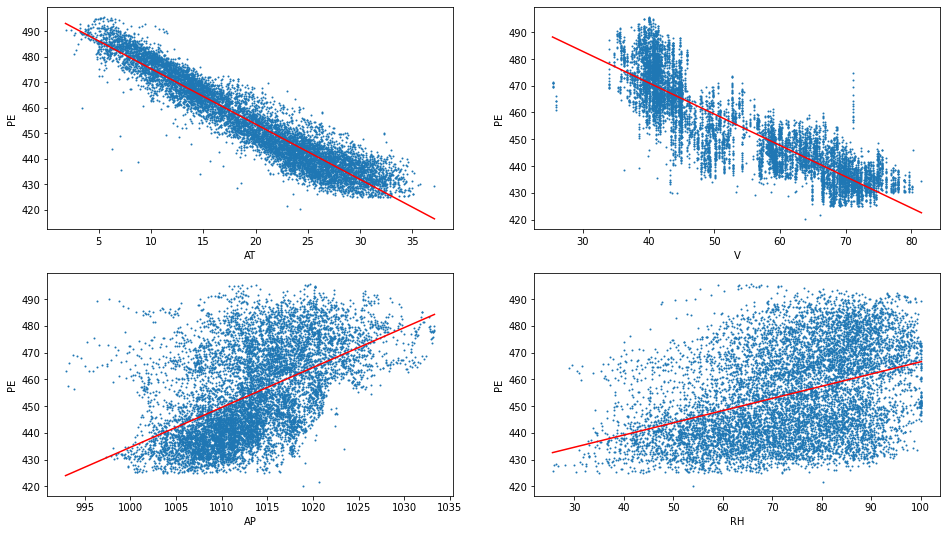

In [15]:
## To plot 
train_target = f[:, -1]

 
simple_regression = [] ### for question e

### # for plot to back up
q = 1
plt.figure(figsize=(16, 9))
for i in range(0, 4):
    plt.subplot(2, 2, q)
    plt.xlabel(col[i])
    plt.ylabel(col[4])
    plt.plot(f[:, i], f[:, 4], 'o', ms=1)
    q += 1
    train_data = f[:, i].reshape(-1, 1)
    clf = linear_model.LinearRegression()
    clf.fit(train_data, train_target)
    x = [min(train_data), max(train_data)]
    y = clf.predict(x)
    plt.plot(x, y, 'r-')
    simple_regression.append(clf.coef_[0])

plt.show()

### from the summary and plot shown above, we can find that there are statistically significant associations between all of our predictors(AT, V, AP, RH) and the response (p < 0.0001). \ Based on the model  plots, we can see all the Cook's Distances are relatively small.\ Using Bonferroni outlier test, I identify some outliers for AT Model and V models, But no outlier for AP and RH model. 

# (d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [16]:

### mutiliple regression model 

X = data[["AT","V","AP","RH"]] ##  ALL predictors 
y = data["PE"] ## target value
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() 
predictions = model.predict(X)

# Print out the statistics
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:35:34   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

### According to the model summary of our multiple linear regression, all p value is small and almost 0, so all of the predictors are statistically significant.  therefore, we reject the null hypothsis for indenpendet variables, the beta is not equal to 0. 

# (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

In [17]:
### to get variable coefficient for multiple regression 
multi_regression = model.params[1:5]

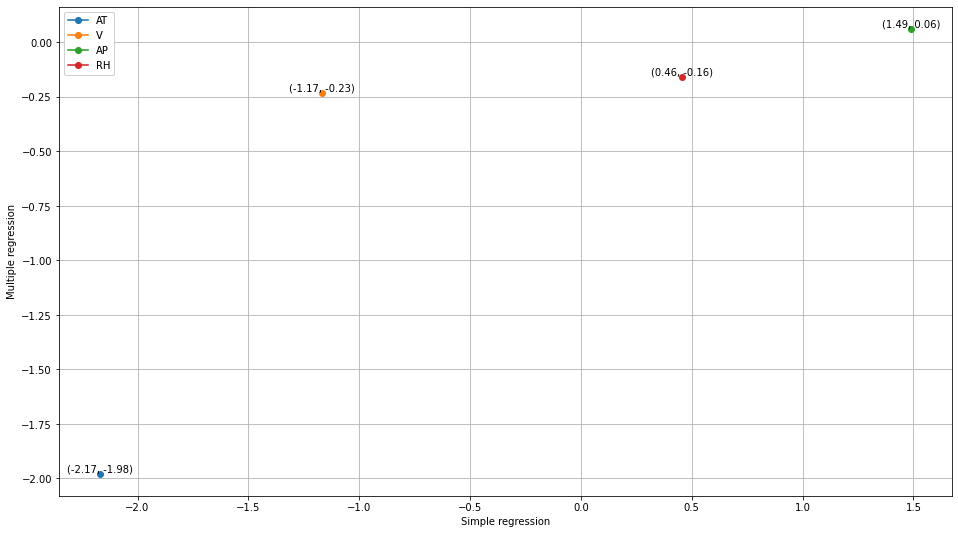

In [18]:
plt.figure(figsize=(16, 9))
for i in range(0, 4):
    plt.plot(simple_regression[i], multi_regression[i],
             marker='o')
    plt.text(simple_regression[i], multi_regression[i], (round(simple_regression[i], 2),
                                                         round(multi_regression[i], 2)), ha='center', va='bottom', fontsize=10)

l = plt.legend(col, loc=2)
plt.gca().add_artist(l)
plt.xlabel("Simple regression")
plt.ylabel("Multiple regression")
plt.grid(True)
plt.show()

# (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form
$Y=\beta_0+\beta_1X+\beta_2X^2+\beta_3X^3+\epsilon$

In [19]:
import statsmodels.formula.api as sm

clf = sm.ols(formula='PE ~ AT+I(AT**2)+I(AT**3)',
                 data=data).fit()
table_AT = clf.summary()

In [20]:
print(table_AT)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:35:34   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    492.7281      0.673    732.248      0.0

The quadratic term and cubic term of AT are both statistically significant because of small p value. so, we can sure that nonlinear association exist between the predictor AT and response PE.

In [21]:
clf = sm.ols(formula='PE ~ V+I(V**2)+I(V**3)',
                 data=data).fit()
table_V = clf.summary()
print(table_V)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:35:35   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    554.1468      9.151     60.557      0.0

The quadratic term is statistically insignificant since the p value =0.768 
but cubic term of V is statisticaly significant since p value is 0.014, which is smaller than alpha(if =0.05).

So in 5% significant level, we conclude that nonlinear association exist between the predictor V and response PE

In [22]:
clf = sm.ols(formula='PE ~ AP+I(AP**2)+I(AP**3)',
                 data=data).fit()
table_AP = clf.summary()
print(table_AP)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:35:35   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0747      0.009      8.415      0.0

The quadratic term and cubic term of AP are both statistically significant (P-value almost 0). however, the R-squared of the model is only 0.275, which means that the model doesn't explain much of variation of the data but it is significant (better than not having a model). so nonlinear association exist between the predictor AP and response PE.

In [23]:
clf = sm.ols(formula='PE ~ RH+I(RH**2)+I(RH**3)',
                 data=data).fit()
table_RH = clf.summary()
print(table_RH)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:35:35   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    468.4135     10.545     44.422      0.0

The quadratic term and cubic term of RH are both statistically significant. however, the r^2 = 0.154, which means that the model doesn't explain much of variation of the data but it is significant (better than not having a model). so nonlinear association exist between the predictor RH and response PE.

# (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant

In [24]:
formula = col[-1]+' ~ AT+ V+ AP+ RH+' 

## Add interaction terms to formula 
for i in range(0, 3):
    for j in range(i+1, 4):
        formula += 'I(' + col[i]+'*'+col[j] + ')+'

#print(formula[:-1])

In [25]:
formula = formula[:-1]

clf = sm.ols(formula=formula,
             data=data).fit()
table = clf.summary()
print(table)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:35:35   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0


There are four interaction terms that are statistically significant:

AT and V (p<0.0001)
AT and RH (p<0.0001)
V and AP (p<0.0001)
AP and RH (p=0.034) WITH 5% Significant level

two interaction terms are not significatn with 5% significant level:

If alpha = 0.05
There are two interaction terms are not significant:
AT and AP (p = 0.452)
V and RH  (p=0.086)



# (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs

In [26]:

formula_1 = 'PE ~ AT+V+AP+RH'
full_formula = 'PE ~ AT+V+AP+RH++I(AT**2)+ I(V**2)+ I(AP**2)+I(RH**2)+I(AT*V)+I(AT*AP)+I(AT*RH)+I(V*AP)+I(V*RH)+I(AP*RH)'


In [58]:
from sklearn.model_selection import train_test_split

### to split the whole dataset into train-70% and test-30%
train_data, test_data = train_test_split(data, test_size=0.3)

### basic base model

In [59]:
from sklearn.metrics import mean_squared_error 
### to fit the model for all predictors 

clf = sm.ols(formula=formula_1,
             data=train_data).fit()

pred_train = clf.predict(train_data.iloc[:, :4])
train_mse_1 = mean_squared_error(train_data.PE,pred_train)

pred_test = clf.predict(test_data.iloc[:, :4])
test_mse_1 = mean_squared_error(test_data.PE,pred_test)
print(train_mse_1)
print(test_mse_1)
print(clf.summary())

21.0661231253683
20.11496194159327
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 2.114e+04
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:50:59   Log-Likelihood:                -19708.
No. Observations:                6697   AIC:                         3.943e+04
Df Residuals:                    6692   BIC:                         3.946e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    434.

In [60]:
print("The train and test error of our base variable model are {} and {} respectively.".format(train_mse_1,test_mse_1))

The train and test error of our base variable model are 21.0661231253683 and 20.11496194159327 respectively.


## model_full: involving all possible interaction terms and quadratic nonlinearities

In [61]:
clf= sm.ols(formula=full_formula,
             data=train_data).fit()

pred_train = clf.predict(train_data.iloc[:, :4])
train_mse_2 = mean_squared_error(train_data.PE,pred_train)

pred_test = clf.predict(test_data.iloc[:, :4])
test_mse_2 = mean_squared_error(test_data.PE,pred_test)
print(train_mse_2)
print(test_mse_2)

print(clf.summary())

18.5313888994609
17.16760088297047
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     6921.
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:51:02   Log-Likelihood:                -19278.
No. Observations:                6697   AIC:                         3.859e+04
Df Residuals:                    6682   BIC:                         3.869e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7000.

In [62]:
print("The train and test error of our complex model are {} and {} respectively.".format(train_mse_2,test_mse_2))

The train and test error of our complex model are 18.5313888994609 and 17.16760088297047 respectively.


 Both of them are smaller than that of in the simpler model respectively.

## remove insignificant variables using p-values

In [63]:
#remove high p-value from model_full
print("remove the highest p-value variables [V:RH] [AT:AP] from model_full becasue high p values.\
hopefully we can make every variables become significant.\n")
clf = sm.ols(formula='PE ~ AT + V + AP + RH + AT : V + AT : RH +V:AP +AP : RH + \
                        + np.power(AT,2)+np.power(V,2)+ np.power(AP,2) + np.power(RH,2)', data=train_data).fit()

pred_train = clf.predict(train_data.iloc[:, :4])
train_mse_3 = mean_squared_error(train_data.PE,pred_train)

pred_test = clf.predict(test_data.iloc[:, :4])
test_mse_3 = mean_squared_error(test_data.PE,pred_test)
print(train_mse_3)
print(test_mse_3)

print(clf.summary())

remove the highest p-value variables [V:RH] [AT:AP] from model_full becasue high p values.hopefully we can make every variables become significant.

18.539812223552634
17.159014659851124
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     8073.
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:51:04   Log-Likelihood:                -19280.
No. Observations:                6697   AIC:                         3.859e+04
Df Residuals:                    6684   BIC:                         3.867e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      c

Now, every variable becomes significant based on their p values. after remove [V:RH] [AT:AP] form variables.

In [64]:
### to report MSE for three models 
MSE_df=pd.DataFrame([[train_mse_1,test_mse_1],[train_mse_2,test_mse_2],[train_mse_3,test_mse_3]],\
                   index=["model_base","model_full",'revised_model_from_full'],columns=["MSE of Training Data","MSE of Test Data"])


MSE_df


,MSE of Training Data,MSE of Test Data
model_base,21.066123,20.114962
model_full,18.531389,17.167601
revised_model_from_full,18.539812,17.159015


so we can see that both Train_MSE and Test_MSE droped if we add interaction terms and quadratic term to basic model. however, both train_mse and test_mse changed little after we remove some insignificant interaction terms
.  

# (i) KNN Regression:i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

In [65]:

# prepare raw features for knn
X_train_raw = train_data.to_numpy()[:,:4]
y_train_raw = train_data.to_numpy()[:,4]
X_test_raw = test_data.to_numpy()[:,:4]
y_test_raw = test_data.to_numpy()[:,4]

In [66]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

## To perform KNN USING K range form 1 to 100
k_range = [*range(1,101)]

knn = KNeighborsRegressor()
# generate train and test MSE for KNN regression using raw features for k in range (1,100)
train_raw_mse = []
test_raw_mse = []

for k in k_range:
    knn.set_params(n_neighbors=k)
    knn.fit(X_train_raw, y_train_raw)
    y_pred_train_raw = knn.predict(X_train_raw)
    y_pred_test_raw = knn.predict(X_test_raw)
    train_raw_mse.append(mean_squared_error(y_train_raw, y_pred_train_raw))
    test_raw_mse.append(mean_squared_error(y_test_raw, y_pred_test_raw))
    

In [67]:
# generate train and test MSE for KNN regression using normlized features for k in range (1,100)
from sklearn.preprocessing import Normalizer

## to normalize the features 
std = Normalizer() # to normalize samples to unit norm
normed_train = std.fit_transform(train_data)
normed_test = std.transform(test_data)

# Prepare normalized data (normlized predictors )for ML 
X_train_normed = normed_train[:,:4]
X_test_normed = normed_test[:,:4]

y_train = train_data.to_numpy()[:,4]
y_test = test_data.to_numpy()[:,4]

train_normed_mse = []
test_normed_mse = []

for k in k_range:
    knn.set_params(n_neighbors=k)
    knn.fit(X_train_normed, y_train)
    y_pred_train = knn.predict(X_train_normed)
    y_pred_test = knn.predict(X_test_normed)
    train_normed_mse.append(mean_squared_error(y_train, y_pred_train))
    test_normed_mse.append(mean_squared_error(y_test, y_pred_test))



In [68]:
### to convert it into a dataframe
error_df = pd.DataFrame(np.column_stack([k_range, train_raw_mse, test_raw_mse, train_normed_mse, test_normed_mse]),
                        columns=['k', 'Raw_Train_MSE', 'Raw_Test_MSE', 'Normalized_Train_MSE', 'Normalized_Test_MSE'], )
error_df['k'] = error_df['k'].astype(int)

In [69]:
### to find minimum mse for each train and each test and their k 
min_train_raw_mse = min(train_raw_mse)
raw_train_k = error_df[error_df["Raw_Train_MSE"]==min_train_raw_mse].k.tolist()

min_test_raw_mse = min(test_raw_mse)
raw_test_k = error_df[error_df["Raw_Test_MSE"]==min_test_raw_mse].k.tolist()

min_train_norm_mse = min(train_normed_mse)
norm_train_k = error_df[error_df["Normalized_Train_MSE"]==min_train_norm_mse].k.tolist()

min_test_norm_mse = min(test_normed_mse)
norm_test_k = error_df[error_df["Normalized_Test_MSE"]==min_test_norm_mse].k.tolist()



In [70]:
print("the minimum raw train MSE is {}, while k = {}".format(min_train_raw_mse,raw_train_k))
print("the minimum raw test MSE is {}, while k = {}".format(min_test_raw_mse,raw_test_k))
print("the minimum normalized train MSE is {}, while k = {}".format(min_train_norm_mse,norm_train_k))
print("the minimum normalized test MSE is {}, while k = {}".format(min_test_norm_mse,norm_test_k))


the minimum raw train MSE is 0.0, while k = [1]
the minimum raw test MSE is 15.80933860397074, while k = [5]
the minimum normalized train MSE is 0.0, while k = [1]
the minimum normalized test MSE is 4.652550170285228, while k = [6]


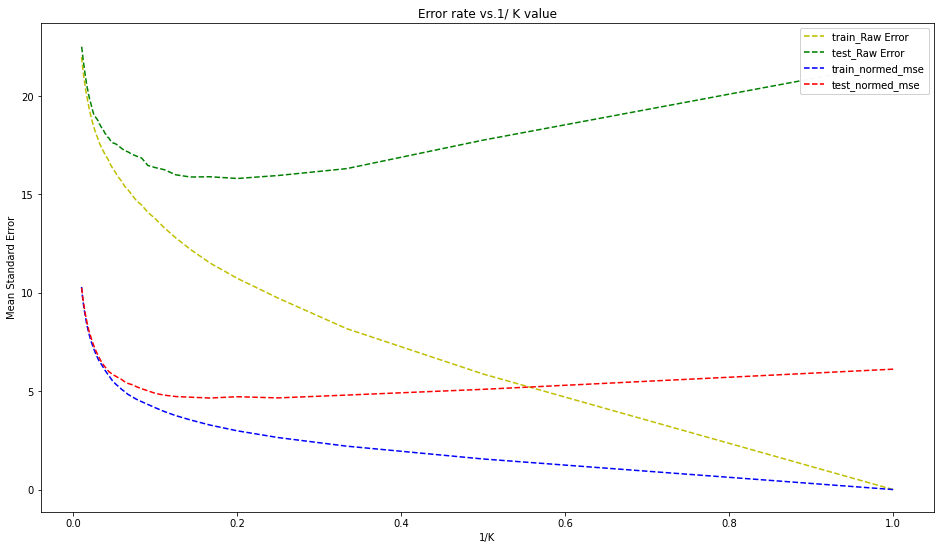

In [71]:
### plot the curve MSE vs 1/k

one_over_k = [1/k for k in k_range]
plt.figure(figsize=(16, 9))
plt.plot(one_over_k, train_raw_mse, 'y--')
plt.plot(one_over_k, test_raw_mse, 'g--')
plt.plot(one_over_k, train_normed_mse, 'b--')
plt.plot(one_over_k, test_normed_mse, 'r--')
plt.title("Error rate vs.1/ K value")
l = plt.legend(('train_Raw Error', 'test_Raw Error', 'train_normed_mse', 'test_normed_mse'), loc=1)
plt.gca().add_artist(l)
plt.xlabel('1/K')
plt.ylabel('Mean Standard Error')

plt.show()

# j) KNN Regression and Linear Regression Model Comparison


In [55]:
#show best MSE of four model in a table
## choose best test mse from linear model
best_linear_mse = min([test_mse_1,test_mse_2,test_mse_3])
best_MSE_df=pd.DataFrame([best_linear_mse,min_test_raw_mse,min_test_norm_mse],\
                        index=["Best Linear Model ","KNN Model(k=7) ","normlized KNN Model(k=4)"],\
                        columns=["MSE of Test Data"])

best_MSE_df

,MSE of Test Data
Best Linear Model,18.347243
KNN Model(k=7),16.084942
normlized KNN Model(k=4),4.573678


In [73]:
print("Linear Regression with best test MSE is {}".format(best_linear_mse))
print("KNN Regression with raw features test MSE (k={}) is {}".format(raw_test_k,min_test_raw_mse))
print("KNN Regression with normalized features test MSE (k={}) is {}".format(norm_test_k,min_test_norm_mse))

Linear Regression with best test MSE is 18.3472431295459
KNN Regression with raw features test MSE (k=[5]) is 15.80933860397074
KNN Regression with normalized features test MSE (k=[6]) is 4.652550170285228



we can directly find that KNN regression model is better than the linear regression model. We can find out that KNN regression with normalized features has lowest test MSE.
Test MSE between our linear regression and KNN regression with raw features are close. Although the later performs better by a close margin, it's more interpretable using linear regression.

 

# 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predic- tors p is small.
Flexible method is better, because n is extremely large, a flexible method will fit data more closely. few predictors makes inflexible method become underfitting.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

Flexible method is worse, because the number of observations is large, a flexible method would overfit the data, which would perform worse on test set. Larger munber of predictors lead the felxible model become overfitting.

### (c) The relationship between the predictors and response is highly non-linear.

Flexible method is better, because the relationship is non-linear, so with more degrees of freedom, a flexible method would fit better. It is hard for inflexible metod to describe the non-liner relationship.

### (d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.

flexible method is worse. A flexible method would fit to the noise in the error terms and increase variance.

# 2. ISLR: 2.4.7

 ### (a) Compute the Euclidean distance between each observation and thet test point,X1 =X2 =X3 =0.




sqrt(3^2) = 3 \

sqrt(2^2) = 2  \

sqrt(1^2 + 3^2) = sqrt(10) = 3.16 4, sqrt(1^2 + 2^2) = sqrt(5) = 2.24 \

sqrt(1^2 + 1^2) = sqrt(2) = 1.41 \ 

sqrt(1^2 + 1^2 + 1^2) = sqrt(3) = 1.73 \

### (b) What is our prediction with K = 1? Why?

when K=1, we choose nearnest one observation, which is 5th observation (distance = 1.41). 
so our predictor is Green 



### (c) What is our prediction with K = 3? Why?

When k=3, we choose first three observations, which is 5th(Green), 6th(red), and 2rd one(red).
so our predictor is red .

## (d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?

if decision boundary is highly nonlinear, so a more flexible model would be a better fit. 
so we would expect a smaller K.
